# Week 07: Pre-Class Assignment: MNIST Classification Contest

### <p style="text-align: right;"> &#9989; Kyle Taft

<p style="text-align: right;"> &#9989; Lucas, Dawit, Jake, Daniel


<!-- ![mnist](https://people.com/thmb/RsPaGUV01xy9G3fCUeHBkyh37Go=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc():focal(683x148:685x150):format(webp)/pharrell-williams-lv-show-062023-walking-d1e73d3922a04e9ea5bfc76c8861b7ed.jpg)
 -->
![mnist](https://miro.medium.com/max/584/1*9Mjoc_J0JR294YwHGXwCeg.jpeg)

## Goals for this Pre-Class Assignment

This Pre-Class assignment is a bit different in that you will work with your team. Think of this much more as a team-based pre-class (PC) assignment. Contact your team members now to ensure that you have a communication link, if you have not already done so. It would be extremely beneficial if you plan to meet with your group members outside of class at least twice before the IC next Monday. 

What you will turn in is this notebook as part of your PCA and your presentation as PDF slides as part of the ICA in D2L. Be sure to have all of your team members have their name on those slides, and who did what, so that everyone gets the proper credit. They are due at the end of class on Monday, and you will have a few minutes to finalize them once you get to class. 

Total number of points: **30 points**

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-Class Assignments" submission folder on D2L.  Submission instructions can be found at the end of the notebook.

## MNIST Contest: Best Classifier Workflow

The class is going to have a contest to see who can get the most accurate classifier for the two MNIST datasets. This is **not** a contest between students, nor is it a contest between groups per se. It is a contest of the ML workflow and the different algorithms. Your final product will be a presentation to the class next Monday. Your team will present a set of slides to the class describing your results. <font color='red'>**Each group has five to ten minutes for their presentation!!**</font>  _It is extremely important that you do not go over your time._ Conversely, you are graded on your content, so do not plan to go much under five minutes either. If you need to practice to get the timing right, please do that. This is the way the real world works, so use this oppportunity to learn how to get a lot of information across quickly and coherently. 

We will start the presentations at 4:00pm, so plan to come to the In class next Monday ready to finalize your plots, practice your talk, tweak your slides, whatever your group needs. Be sure that you are able to connect to the projector; make sure the slides are on a laptop with, say, an HDMI port. Be prepared to ask questions to the speakers. If everyone has a working presentation we may start early to give more time for discussion.

### Contest Goals

Your group can pick any classifiers it wants. You can pick one or many; be sure to give yourself enough time if you pick  many. The goal is to optimize those classifiers to get the most accurate results on both MNIST datasets. The "winner" is the overall algorithm that, when used in the same way on both, gets the most accurate result, defined as the average of the two scores from each MNIST datasets. Below I'll go into what I mean by "score", since that is subtle for classifiers.

For example, you might:
* Choose SGDClassifer because it is simple, you know how to use it, and there are many options. 
* Perform feature selection.
* Perform CV and learning curves.
* Regularization.

Or, you might:
* Pick MLP, since you know them, but _also_ SVCs because you'll be ahead when we get there and you'll have an interesting way to know what architecture MLP needs to get good results. 
* Focus on the nuances of those two methods (e.g., width/depth/activation, kernels) to see which is best. 

Or, you might:
* Pick just MLP, since you know them and they are very flexible. 
* Focus on the many ways to optimize MLPs (e.g., varying activcation functions).

Or, you might:
* Pick several methods, because one way to win is to have an internal contest first!! This also makes working with your group easier because you can assign one classifier to each person and put the comparisons together for the presentation. 

Or, you might:
* Focus on those things your group will use in their projects, such as a Keras/TensorFlow approach. If you are using CNNs for your project this is a great time to practice.  


You get the idea. 

_Be very organized: your group has three people in it, so be sure to divide and conquer, communicate well, meet in person and don't wait too long_. You have 20 minutes once you get to class to get your final presentation in order and make sure it works on the projector - show up early if you need to. 

### Your Presentation

You should include:
* What ML algorithm(s) you used, and why.
* What the **baseline** results are for these methods, with **no** tweaking.
* Discussion of all of the improvements you made to these algorithms through hyperparameter tuning, scaling, selection and so on. Show plots for every case to back up what you did.
* Show a diagram of your proposed ML workflow. Because this is classification, be sure to use as many new tools as you can (see below).
* Show your final result which is the average of the best two scores from both MNIST datasets using that same workflow. Don't tune the workflow to the two datasets separately: we are looking for transferability - the ability for a workflow on one dataset to also work on another.
* It is very important that you use the new techniques we are learning this week that are classifier specific (e.g., confusion matrices).


## Part 1. Get the data and explore the data. (12 points)

Here, I'll cover a few concepts to help your team get started. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# This can take a minute or two to download. Depending on your TF version you may get different results. 
from keras.datasets import fashion_mnist, mnist
from sklearn.model_selection import train_test_split


2023-10-15 16:13:23.056979: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/software/Python/3.7.2-GCCcore-6.4.0/lib:/opt/software/libffi/3.2.1-GCCcore-6.4.0/lib64:/opt/software/libffi/3.2.1-GCCcore-6.4.0/lib:/opt/software/GMP/6.1.2-GCCcore-6.4.0/lib:/opt/software/SQLite/3.23.0-GCCcore-6.4.0/lib:/opt/software/ncurses/6.1-GCCcore-6.4.0/lib:/opt/software/libreadline/7.0-GCCcore-6.4.0/lib:/opt/software/Java/1.8.0_152/lib:/opt/software/Tcl/8.6.8-GCCcore-6.4.0/lib:/opt/software/Boost/1.67.0-foss-2018a/lib:/opt/software/zlib/1.2.11-GCCcore-6.4.0/lib:/opt/software/bzip2/1.0.6-GCCcore-6.4.0/lib:/opt/software/ScaLAPACK/2.0.2-gompi-2018a-OpenBLAS-0.2.20/lib:/opt/software/FFTW/3.3.7-gompi-2018a/lib:/opt/software/OpenBLAS/0.2.20-GCC-6.4.0-2.28/lib:/opt/software/imkl/2018.1.163-gompi-2018a/mkl/lib/intel64:/opt/software/imkl/2

In [2]:
# digits
(X_train, y_train), (X_test, y_test)  = mnist.load_data()

# fashion: note how the split occurs automatically for this dataset
(X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion) = fashion_mnist.load_data()


In [3]:

# confirm we know the size of the data
print(f"MNIST Digits:")
print(f"Size of training set: {X_train.shape}")
print(f"Size of testing set: {X_test.shape}")
print(f"Target labels: {np.unique(y_test)}")

# It is highly recommended that you print out these variables so that you can 
# see what is in them and how to use them correctly. It's good to get a sense 
# for what you are passing into the ML libraries.

MNIST Digits:
Size of training set: (60000, 28, 28)
Size of testing set: (10000, 28, 28)
Target labels: [0 1 2 3 4 5 6 7 8 9]


&#9989; **Task 1.1: (2 points)** Print out the sizes of the `fashion_mnist`

* train and test datasets
* the unique values of the targets   

In [4]:
# put your code here
print(f"MNIST Fashion:")
print(f"Size of training set: {X_train_fashion.shape}")
print(f"Size of testing set: {X_test_fashion.shape}")
print(f"Target labels: {np.unique(y_test_fashion)}")

MNIST Fashion:
Size of training set: (60000, 28, 28)
Size of testing set: (10000, 28, 28)
Target labels: [0 1 2 3 4 5 6 7 8 9]


&#9989; **Question 1.2: (2 points)**

1. What is the size of each image in the fashion MNIST dataset?
2. What do the numbers in the target labels correspond to, _e.g._ what item of clothing?

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

1. 28x28

2. 

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot


## Visualization

Let's show some examples of the MNIST datasets

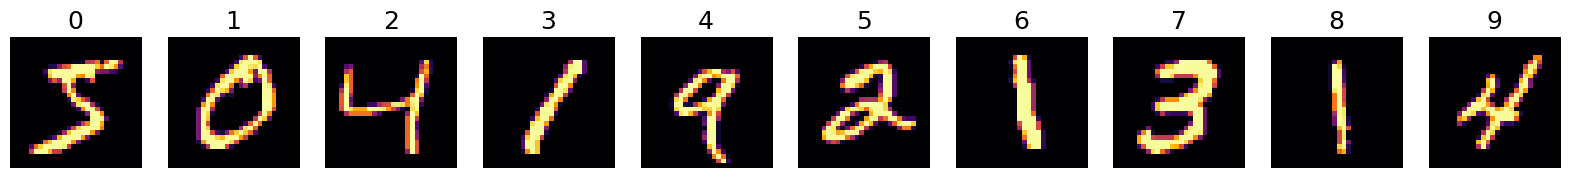

In [5]:
# Create a dictionary to track which numbers we have plotted
plotted_numbers = {}

# Plot the first instance of each number
fig, axes = plt.subplots(1, 10, figsize=(20, 5))
for i, label in enumerate(y_test):
    if label not in plotted_numbers:
        plotted_numbers[label] = True
        ax = axes[label]
        ax.imshow(X_train[label], cmap='inferno')
        # ax.imshow(X_train[label], cmap='ocean') # Go Green!
        # ax.imshow(X_train[label], cmap='plasma') # Go Blue!
        ax.set_title(f"{label}", fontsize = 18)
        ax.axis('off')
    if len(plotted_numbers) == 10:
        break


&#9989; **Task 1.3: (2 points)** Make a similar plot for the fashion images

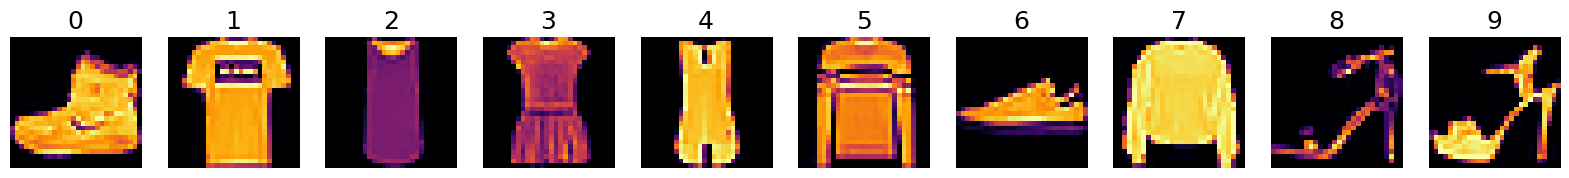

In [6]:
# Put your code here
# Create a dictionary to track which numbers we have plotted
plotted_numbers = {}

# Plot the first instance of each number
fig, axes = plt.subplots(1, 10, figsize=(20, 5))
for i, label in enumerate(y_test_fashion):
    if label not in plotted_numbers:
        plotted_numbers[label] = True
        ax = axes[label]
        ax.imshow(X_train_fashion[label], cmap='inferno')
        # ax.imshow(X_train[label], cmap='ocean') # Go Green!
        # ax.imshow(X_train[label], cmap='plasma') # Go Blue!
        ax.set_title(f"{label}", fontsize = 18)
        ax.axis('off')
    if len(plotted_numbers) == 10:
        break


### Prepare the data for classification

With the data in hand, split, we need to think about the goal of our classifier. As discussed in the lecture, there are several ways we can think about the MNIST data from the point of view of classification. Since we are just warming up, let's examine **binary** classification first. Because both MNISTs have ten features we can pick just one feature and see if your algorithm(s) can find that one from the others. Let's choose "1" from digits and work through that; your team should extend to the MNIST fashion case. 

<font color='green'>**We are only using _binary_ classification here to allow for the widest possible uniform comparison across ML algorithms.**</font> 

&#9989; **Question 1.4: (2 points)** What are some of the classifier that can't do multiclass classification in `sklearn`? You need to name at least two.

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 


1. Linear classifier
2. Logistic regression


Let's remake the labels such that there are only two ("binary") classes; the "1"s have one value and everything else has some other value. First, we need to find the "1"s and then let's make them be 1 and everything else 0. 

Think about what this code does (very Pythonic!):

In [7]:
y_train_1 = (y_train == 1)*1
y_test_1 = (y_test == 1)*1

print(y_train_1[0:100])

[0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


&#9989; **Task 1.5: (2 points)** Do the same for the fashion datasets.

In [8]:
# Put your code here
y_train_fashion_1 = (y_train_fashion == 1)*1
y_test_fashion_1 = (y_test_fashion == 1)*1

print(y_train_fashion_1[0:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0]


But wait the data is still not ready to be fed to `sklearn` classifiers! Each feature in our dataset is a 28 x 28 image and not a 1D array whose columns are features. Let's reshape our images so that we have in the right form.

In [9]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(X_train.shape)

(60000, 784)


&#9989; **Task 1.6: (2 points)** Do the same for the fashion datasets.

In [10]:
# Put your code here
X_train_fashion = X_train_fashion.reshape(X_train_fashion.shape[0], -1)
X_test_fashion = X_test_fashion.reshape(X_test_fashion.shape[0], -1)

print(X_train_fashion.shape)

(60000, 784)


## Part 2. Classification! (8 points)

Now, we have our data both split and converted to a form that can be used in a binary classifier setting. Any "1" should train to a 1 and everything else should train to a 0. All set! 

Wait! What classifier will we use? So many to choose from.... Last time we used the simplest of them all, `SGDClassifier`, so let's try that out. You might choose this for your team? Note that there are quite a few options, but we need to start with the baseline case.  

In [11]:
# Classifiers! Classifiers everywhere!
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# SGD 
# You might have to change the hyperparameters on your computer
SGD_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
SGD_clf.fit(X_train, y_train_1)

SGDClassifier(random_state=42)

In [13]:
# # MLP
# # You might have to change the hyperparameters on your computer
# MLP_clf = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(100), max_iter = 100, random_state=42)
# MLP_clf.fit(X_train, y_train_1)

# #save the model
# import pickle
# filename = 'mlp_model.sav'
# pickle.dump(MLP_clf, open(filename, 'wb'))


In [14]:
#load the model
import pickle
filename = 'mlp_model.sav'
MLP_clf = pickle.load(open(filename, 'rb'))

In [15]:
# KNN
# You might have to change the hyperparameters on your computer
KNN_clf = KNeighborsClassifier(n_neighbors=3)
KNN_clf.fit(X_train, y_train_1)

KNeighborsClassifier(n_neighbors=3)

&#9989; **Task 2.1: (2 points)** Do the same with your classifiers for the fashion dataset

In [16]:
# put your code here

# SGD
# You might have to change the hyperparameters on your computer
SGD_clf_fashion = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
SGD_clf_fashion.fit(X_train_fashion, y_train_fashion_1)



# KNN
# You might have to change the hyperparameters on your computer
KNN_clf_fashion = KNeighborsClassifier(n_neighbors=3)
KNN_clf_fashion.fit(X_train_fashion, y_train_fashion_1)



KNeighborsClassifier(n_neighbors=3)

In [17]:
# # MLP
# # You might have to change the hyperparameters on your computer
# MLP_clf_fashion = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(100), max_iter = 10, random_state=42) # had to change max_iter to 10 since it kept crashing
# MLP_clf_fashion.fit(X_train_fashion, y_train_fashion_1)

# #save the model
# import pickle
# filename = 'mlp_model_fashion.sav'
# pickle.dump(MLP_clf_fashion, open(filename, 'wb'))

In [18]:
import pickle
filename = 'mlp_model_fashion.sav'
MLP_clf_fashion = pickle.load(open(filename, 'rb'))

Wow. Don't you love using `sklearn`? That's it! So few lines of code......

But, notice that `sklearn` is telling us that there are a lot of other options beyond the defaults - perfect for this assignment! 

Since this is ML, let's try some predictions....

In [19]:
print('\tSGD,\tMLP,\tKNN,\tActual')
for loop in range(10):
    sgd_prediction = SGD_clf.predict([X_train[loop]])
    mlp_prediction = MLP_clf.predict([X_train[loop]])
    knn_prediction = KNN_clf.predict([X_train[loop]])
    print(f"\t {sgd_prediction[0]},\t {mlp_prediction[0]},\t {knn_prediction[0]},\t  {y_train[loop]}")

	SGD,	MLP,	KNN,	Actual


	 0,	 0,	 0,	  5
	 0,	 0,	 0,	  0
	 0,	 0,	 0,	  4
	 1,	 1,	 1,	  1
	 0,	 0,	 0,	  9
	 0,	 0,	 0,	  2
	 1,	 1,	 1,	  1
	 0,	 0,	 0,	  3
	 1,	 1,	 1,	  1
	 0,	 0,	 0,	  4


&#9989; **Task 2.2: (2 points)** Do the same for the fashion dataset using your classifiers

In [20]:
# Put your code here
print('\tSGD,\tMLP,\tKNN,\tActual')
for loop in range(10):
    sgd_prediction = SGD_clf_fashion.predict([X_train_fashion[loop]])
    mlp_prediction = MLP_clf_fashion.predict([X_train_fashion[loop]])
    knn_prediction = KNN_clf_fashion.predict([X_train_fashion[loop]])
    print(f"\t {sgd_prediction[0]},\t {mlp_prediction[0]},\t {knn_prediction[0]},\t  {y_train_fashion[loop]}")

	SGD,	MLP,	KNN,	Actual
	 0,	 0,	 0,	  9
	 0,	 0,	 0,	  0
	 0,	 1,	 0,	  0
	 0,	 0,	 0,	  3
	 0,	 0,	 0,	  0
	 0,	 0,	 0,	  2
	 0,	 0,	 0,	  7
	 0,	 0,	 0,	  2
	 0,	 0,	 0,	  5
	 0,	 0,	 0,	  5


### Cross Validation

Are your classifiers able to correctly predict the images?
Certainly that quick peek gives us confidence it is working; but, there are _thousands_ of samples in the MNIST database. We need a better way to check for accuracy. Let's use CV!

In [21]:
from sklearn.model_selection import cross_val_score

# print(f'SGD: ', cross_val_score(SGD_clf, X_train, y_train_1, cv=3, scoring='accuracy'))
# print(f'MLP: ', cross_val_score(MLP_clf, X_train, y_train_1, cv=3, scoring='accuracy'))
# print(f'KNN: ', cross_val_score(KNN_clf, X_train, y_train_1, cv=3, scoring='accuracy'))

"""
SGD:  [0.9878  0.98095 0.99005]
MLP:  [0.99615 0.99605 0.9974 ]
KNN:  [0.9944  0.99485 0.9952 ]
"""

'\nSGD:  [0.9878  0.98095 0.99005]\nMLP:  [0.99615 0.99605 0.9974 ]\nKNN:  [0.9944  0.99485 0.9952 ]\n'

&#9989; **Task 2.3: (2 points)** Do the same for the fashion dataset using your classifiers

In [25]:
# Put your code here
# print(f'SGD: ', cross_val_score(SGD_clf_fashion, X_train_fashion, y_train_fashion_1, cv=3, scoring='accuracy'))
# print(f'MLP: ', cross_val_score(MLP_clf_fashion, X_train_fashion, y_train_fashion_1, cv=3, scoring='accuracy'))
# print(f'KNN: ', cross_val_score(KNN_clf_fashion, X_train_fashion, y_train_fashion_1, cv=3, scoring='accuracy'))

"""
SGD:  [0.98805 0.9911  0.9843 ]
MLP:  [0.98815 0.98835 0.9    ]
KNN:  [0.9963  0.9953  0.99565]
"""


'\nSGD:  [0.98805 0.9911  0.9843 ]\nMLP:  [0.98815 0.98835 0.9    ]\nKNN:  [0.9963  0.9953  0.99565]\n'

Looks like [put your classifier here] is extremely accurate!! Great job!

But, let's think about this.... What is the worst it could be? 

In [23]:
print('MNIST Digits')
print('The total number is: ', len(y_train))
print('The total number of 1s is: ', sum(y_train_1))
print('Chance of being wrong if we guess not 1: ', 100*sum(y_train_1)/len(y_train), '%')

MNIST Digits
The total number is:  60000
The total number of 1s is:  6742
Chance of being wrong if we guess not 1:  11.236666666666666 %


&#9989; **Task 2.4: (2 points)** Do the same for the fashion dataset using your classifiers

In [24]:
# Put your code here
print('MNIST Fashion')
print('The total number is: ', len(y_train_fashion))
print('The total number of 1s is: ', sum(y_train_fashion_1))
print('Chance of being wrong if we guess not 1: ', 100*sum(y_train_fashion_1)/len(y_train_fashion), '%')

MNIST Fashion
The total number is:  60000
The total number of 1s is:  6000
Chance of being wrong if we guess not 1:  10.0 %


This is an important lession in ML: sometimes the simplest rule gives a great result. Here, the simplest rule is: skip ML and simply guess **not 1**, since we know there are very few ones in there. If we do, we get about 90% accuracy with zero effort! Who needs ML!?

What this tells us is that ML can really only help us with the final 10%. Our goal then is to get as close to 100% accuracy as we can. But, the main point is that this is just not a very good way to measure how well we are doing. We need to remove this "trivial" part. 

---
## Part 3. Analyze your results (10 points)

### Confusion Matrix

![cm](http://rasbt.github.io/mlxtend/user_guide/evaluate/lift_score_files/lift_cm_1.png)

Rather than getting a prediction _score_, let's examine _how things are being classified_. 

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, classification_report

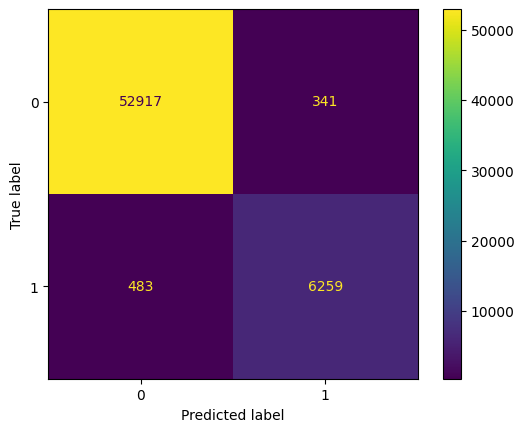

In [27]:
y_train_pred = cross_val_predict(SGD_clf, X_train, y_train_1, cv=3, n_jobs= -1)
con_mat = confusion_matrix(y_train_1, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= con_mat)
_ = disp.plot()

In [28]:
print(classification_report(y_train_1, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     53258
           1       0.95      0.93      0.94      6742

    accuracy                           0.99     60000
   macro avg       0.97      0.96      0.97     60000
weighted avg       0.99      0.99      0.99     60000



$$ {\rm F_1} = 2 \left ( \frac{1}{{\rm precision}} + \frac{1}{\rm recall} \right )^{-1} $$

&#9989; **Task 3.1: (2 points)** Do the same for the fashion dataset. 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     54000
           1       0.92      0.97      0.94      6000

    accuracy                           0.99     60000
   macro avg       0.96      0.98      0.97     60000
weighted avg       0.99      0.99      0.99     60000



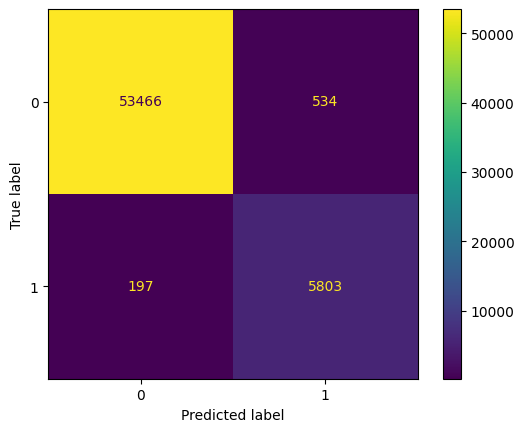

In [29]:
# Put your code here 

y_train_pred_fashion = cross_val_predict(SGD_clf_fashion, X_train_fashion, y_train_fashion_1, cv=3, n_jobs= -1)
con_mat_fashion = confusion_matrix(y_train_fashion_1, y_train_pred_fashion)
disp_fashion = ConfusionMatrixDisplay(confusion_matrix= con_mat_fashion)
_ = disp_fashion.plot()

print(classification_report(y_train_fashion_1, y_train_pred_fashion))

&#9989; **Questions 3.2: (4 points)** 

1. What does `cross_val_predict` do?
2. Look at the diagram above and interpret your confusion matrix. What does it tell you?

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

1. cross_val_predict returns the predicted values for each data point when it is in the test set. This is different from cross_val_score which returns the score for each fold.

2. The diags are telling us the correct classifications. More specifically the top left is the number of non-ones that it preidicts as being non-ones and the bottom right are the number of ones that it predicts as ones. The off diags are the wrong predictions. The top right are the number of non-ones that it predicts as ones and the bottom left are the number of ones that it predicts as non-ones.

### Precision and Recall

Let's examine precision and recall next to get a better sense for how well we are doing. Now is a very good time to [review this](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html). 

The precision is: 0.95
The recall is: 0.93


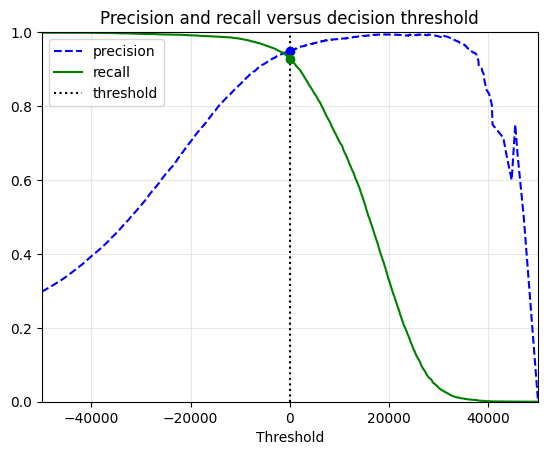

In [31]:
TP = con_mat[1,1]
FP = con_mat[0,1]
FN = con_mat[1,0]

print(f'The precision is: {TP/(TP + FP):.2f}')
print(f'The recall is: {TP/(TP + FN):.2f}')

y_scores = cross_val_predict(SGD_clf, X_train, y_train_1, cv=3,method='decision_function', n_jobs= - 1)
precisions, recalls, thresholds = precision_recall_curve(y_train_1, y_scores)

threshold = 0
plt.figure()
plt.title('Precision and recall versus decision threshold')
plt.plot(thresholds, precisions[:-1], "b--", label="precision")
plt.plot(thresholds, recalls[:-1], "g-", label="recall")
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.grid(alpha = 0.3)
plt.xlabel("Threshold")
plt.axis([-50000, 50000, 0, 1])

_ = plt.legend()


&#9989; **Task 3.3: (2 points)** Do the same for the fashion dataset

The precision is: 0.92
The recall is: 0.97


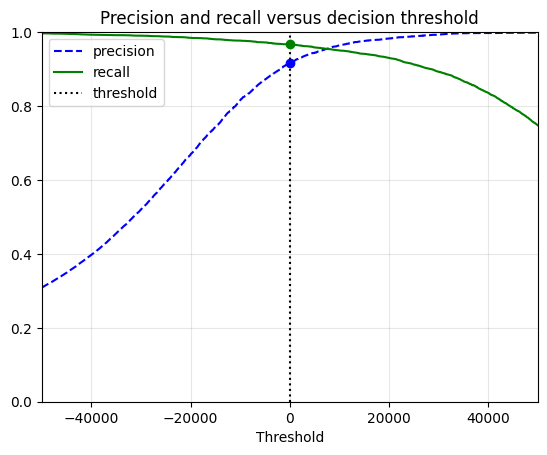

In [32]:
# Put your code here
TP_fashion = con_mat_fashion[1,1]
FP_fashion = con_mat_fashion[0,1]
FN_fashion = con_mat_fashion[1,0]

print(f'The precision is: {TP_fashion/(TP_fashion + FP_fashion):.2f}')
print(f'The recall is: {TP_fashion/(TP_fashion + FN_fashion):.2f}')

y_scores_fashion = cross_val_predict(SGD_clf_fashion, X_train_fashion, y_train_fashion_1, cv=3,method='decision_function', n_jobs= - 1)
precisions_fashion, recalls_fashion, thresholds_fashion = precision_recall_curve(y_train_fashion_1, y_scores_fashion)

threshold_fashion = 0
plt.figure()
plt.title('Precision and recall versus decision threshold')
plt.plot(thresholds_fashion, precisions_fashion[:-1], "b--", label="precision")
plt.plot(thresholds_fashion, recalls_fashion[:-1], "g-", label="recall")
plt.vlines(threshold_fashion, 0, 1.0, "k", "dotted", label="threshold")

idx_fashion = (thresholds_fashion >= threshold_fashion).argmax()  # first index ≥ threshold
plt.plot(thresholds_fashion[idx_fashion], precisions_fashion[idx_fashion], "bo")
plt.plot(thresholds_fashion[idx_fashion], recalls_fashion[idx_fashion], "go")
plt.grid(alpha = 0.3)
plt.xlabel("Threshold")
plt.axis([-50000, 50000, 0, 1])

_ = plt.legend()

&#9989; **Questions 3.4: (2 points)** 

1. What does the option `method = 'decision_function'` in `cross_val_predict` do?

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

1. It returns the raw outputed value for each data point. This allows us to set a threshold for the prediction. If the value is above the threshold then it is a one and if it is below the threshold then it is not a one.




Isn't it great that all of this is already in `sklearn`?!

![stop_me](https://image.spreadshirtmedia.com/image-server/v1/mp/designs/1019968346,width=178,height=178,version=1550492147/stop-talking-sign.png)

Ok, I'll shut up now. I wanted to give you enough code and ideas that you could get started easily. I want you to focus on the ML methods specifically for classification and your presentation, not setting up all of the code above. Again, be sure to use all of your team members effectively. You might assign each person a classifier, or perhaps one person does confusion matrices, one person makes ROC/precision/recall curves and one person runs 1-3 classifiers. Or, one student owns digits, one student owns fashion and the other assembles all results in to a coherent presentation and gives the presentation. Your choice! 

What we want to do is compare your overall agorithms and accuracy metrics with choices from the other groups, so have a summary slide with:
* all ML algorithms used,
* accuracy metric used,
* result you were able to obtain. 

[Here is an example.](https://martin-thoma.com/comparing-classifiers/) Look at the results at the bottom: we will make such a table as we go through the presentations. 

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**


In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/QyrbnptkyA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

&#169; Copyright 2023, Department of Computational Mathematics, Science and Engineering at Michigan State University.